In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        
        self.eta=eta  #학습률
        
        self.n_iter=n_iter #훈련 데이터셋 반복 횟수
        
        self.random_state= random_state #가중치 무작윙 초기화를 위한 난수 시드 생성기
    
    def fit(self, X, y): #X는 n_samples개 데이터, n_features개 특징으로 구성된 훈련데이터 
        
        rgen = np.random.RandomState(self.random_state) 
        self.w_=rgen.normal(loc=0.0, scale=0.01, size= 1+X.shape[1] )#표준편차 0.01인 노말분포에서 크기 n_features+1인 난수 
        
        self.errors_=[]
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update      # x0=1이라고 뒀으니까         
                errors += int(update !=0.0) # update 값이 0이 아니라면 errors에 더해라
            self.errors_.append(errors) #그 값을 계속 기록해라
        return self                    
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]
                            
    def predict(self, X):
        return np.where(self.net_input(X)>=0.0, 1, -1)

In [68]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                  'machine-learning-databases/iris/iris.data',
                  header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [66]:
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',-1,1) #setosa=-1 versicolor=1 자료에 setosa 50개 versicolor 50개 virginica 50개있음 차례로
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [70]:
#꽃 받침 길이와 꽃잎 길이를 추출합니다
X=df.iloc[0:100,[0,2]].values

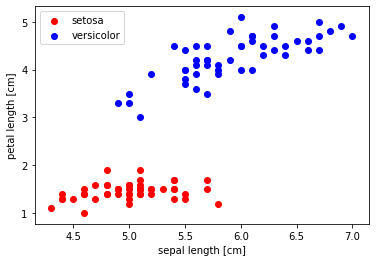

In [76]:
%matplotlib inline 
#산점도를 그립니다.
plt.scatter(X[:50,0],X[:50,1],color='red',label='setosa') #setosa
plt.scatter(X[50:100,0],X[50:100,1],color='blue',label='versicolor') #versicolor
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()
#해석 : 선형 결정 경계(ex 퍼셉트론)로 setosa versicolor 구분하는게 가능할 것이다.        

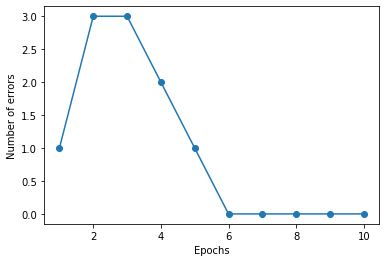

In [80]:
ppn=Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.show()
#6번째 에포크 이후에 수렴했고 훈련 샘플을 완벽하게 분류 

In [82]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map #레드랑 블루만 쓸거긴함 
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정경계 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))  #최소 최댓값사이 0.02간격으로 나누기
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) #각 포인트에 대응하는 클래스 레이블 z 예측
    Z = Z.reshape(xx1.shape)  #xx1의 그리드로 크기 변경 
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) #등고선 그래프 각각 다른색으로 맵핑
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도 그리기
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

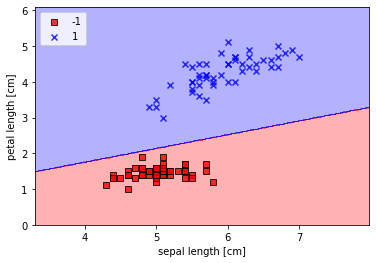

In [83]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()